In [1]:
import os 
import numpy as np
import cv2 as cv

In [2]:
path = 'E:/NMIMS_Semester III/Image Proceesing - ANN, CNN/datasets/Concrete Crack Dataset/data/'

In [3]:
classes = {'Positive':0, 'Negative':1}

In [4]:
images = []
labels = []

def load_data(path):
    for folders in os.listdir(path):
        for files in os.listdir(path + folders + '/'):
            image = cv.imread(path + folders + '/' + files)
            if image is None:
                continue
            image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
            image = cv.resize(image, (128, 128))
            image = image.astype('float32')/255.0
            label = classes[folders]
            images.append(image)
            labels.append(label)
    images_r = np.array(images)
    labels_r = np.array(labels)
    return images_r, labels_r

In [5]:
images, labels = load_data(path)

In [6]:
images.shape, labels.shape

((40000, 128, 128), (40000,))

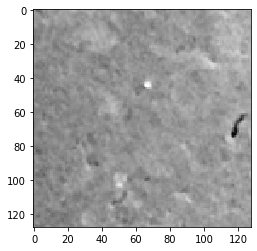

In [7]:
import matplotlib.pyplot as plt
plt.imshow(images[0], cmap='gray')

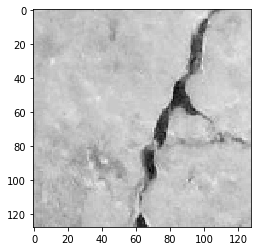

In [8]:
plt.imshow(images[20001], cmap='gray')

In [9]:
images = images.reshape((images.shape[0], 128, 128, 1))

In [10]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.1, random_state=10)

In [12]:
Y_train_req = to_categorical(Y_train)
Y_test_req = to_categorical(Y_test)

print(X_train.shape, X_test.shape, Y_train_req.shape, Y_test_req.shape)

(36000, 128, 128, 1) (4000, 128, 128, 1) (36000, 2) (4000, 2)


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmentor = ImageDataGenerator(rotation_range=40, height_shift_range=0.2, width_shift_range=0.2, horizontal_flip=True, vertical_flip=True, zoom_range=0.1, validation_split=0.05)

train_batches = augmentor.flow(X_train, Y_train_req, shuffle=True, subset='training')
val_batches = augmentor.flow(X_train, Y_train_req, subset='validation')

In [14]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input, Dropout
from tensorflow.keras.models import Sequential

In [15]:
model = Sequential()
model.add(Input((128, 128, 1)))

model.add(Conv2D(16, (3,3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Conv2D(16, (3,3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Flatten())

model.add(Dense(120, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
steps = 34200/32

history = model.fit_generator(train_batches, validation_data=val_batches, epochs=10, steps_per_epoch=steps)

Epoch 1/10
1069/1068 [==============================] - 103s 97ms/step - loss: 0.1025 - accuracy: 0.9625 - val_loss: 0.0294 - val_accuracy: 0.9911
Epoch 2/10
1069/1068 [==============================] - 126s 118ms/step - loss: 0.0494 - accuracy: 0.9842 - val_loss: 0.0351 - val_accuracy: 0.9900
Epoch 3/10
1069/1068 [==============================] - 155s 145ms/step - loss: 0.0373 - accuracy: 0.9887 - val_loss: 0.0338 - val_accuracy: 0.9944
Epoch 4/10
1069/1068 [==============================] - 154s 144ms/step - loss: 0.0334 - accuracy: 0.9892 - val_loss: 0.0312 - val_accuracy: 0.9922
Epoch 5/10
1069/1068 [==============================] - 155s 145ms/step - loss: 0.0287 - accuracy: 0.9909 - val_loss: 0.0238 - val_accuracy: 0.9911
Epoch 6/10
1069/1068 [==============================] - 148s 138ms/step - loss: 0.0254 - accuracy: 0.9919 - val_loss: 0.0175 - val_accuracy: 0.9944
Epoch 7/10
1069/1068 [==============================] - 168s 157ms/step - loss: 0.0211 - accuracy: 0.9938 - val_l

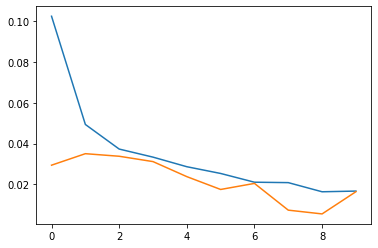

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

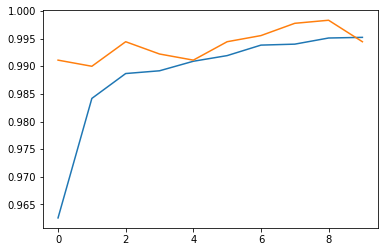

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [21]:
model.evaluate(X_test, Y_test_req)

4000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.0073608684347709645, 0.99825]

In [22]:
model.save('E:/NMIMS_Semester III/Image Proceesing - ANN, CNN/Saved Models/Concrete Crack Classification/Concrete_crack_classification.h5')